### all data used from Frost et al., 2001

In [2]:
import numpy as np
import pandas as pd

import os
import pickle

import utm

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

In [3]:
class_major = pd.read_excel("../_PETRO/classification_workdata.xlsx", index_col=0, 
                            usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26])

## Fe-number


### FeO/(FeO+MgO) = 0.446+ 0.0046 * wt% SiO2 --> from Miyasiro, 1970

In [4]:
def Fe_number_classification(df):
    
    # Create copy of dataframe since we don't want the temporary variables 
    # to end up in the original dataframe
    
    # Calculate temporary variables needed for classification
    df["FeO/(FeO+MgO)"] = df["FeO"] / (df["FeO"] + df["MgO"])
    df["Miyashiro value"] = 0.446 + 0.0046 * df["SiO2"]
    df["Fe-miyashiro"] = df["FeO/(FeO+MgO)"] - df["Miyashiro value"]
    
    # Perform classification
    bins = [-99, 0, 99] # negative or positive
    cats = ["magnesian", "ferroan"] # classes
    # Assign classes to original dataframe
    df["Fe-number"] = pd.cut(df["Fe-miyashiro"], bins=bins, labels=cats)

    # Drop temporary variables
    df = df.drop(["Miyashiro value", "Fe-miyashiro"], axis=1)
    
    return df

In [5]:
class_major = Fe_number_classification(class_major)

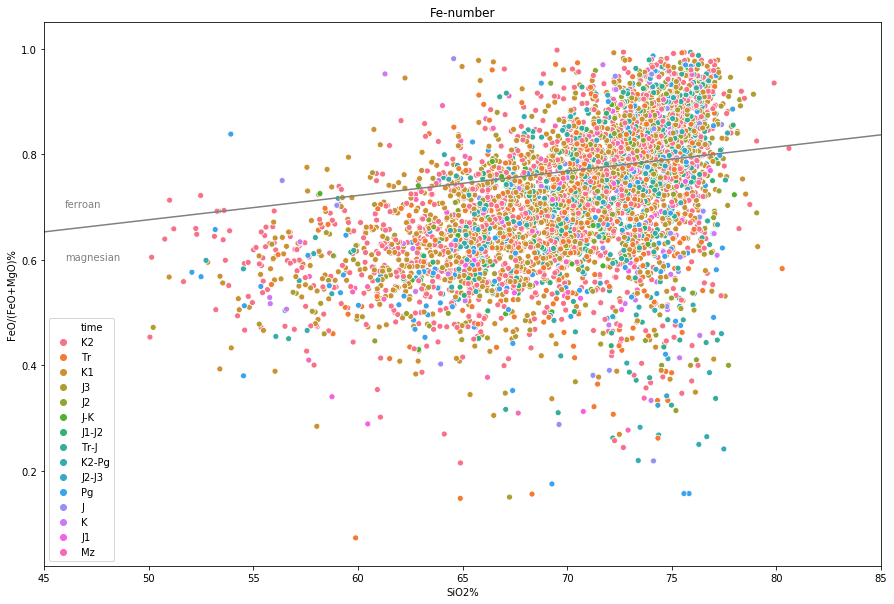

In [6]:
SiO2 = np.arange(0, 101, 1)

plt.figure(figsize=(15,10))

# plt.scatter(class_major["SiO2"] , class_major["FeO/(FeO+MgO)"])
sns.scatterplot(x="SiO2" , y="FeO/(FeO+MgO)", data=class_major, hue="time")
plt.plot(SiO2, 0.446 + 0.0046 * SiO2, 'grey')

plt.xlim((45, 85))

plt.ylabel('FeO/(FeO+MgO)%')
plt.xlabel('SiO2%')
plt.title('Fe-number')

plt.text(46, 0.7, "ferroan", color='grey')
plt.text(46, 0.6, "magnesian", color='grey')

# sns.despine()

plt.show();

In [7]:
Fe_check = pd.read_excel("../_PETRO/Fe_check.xlsx", index_col=0)

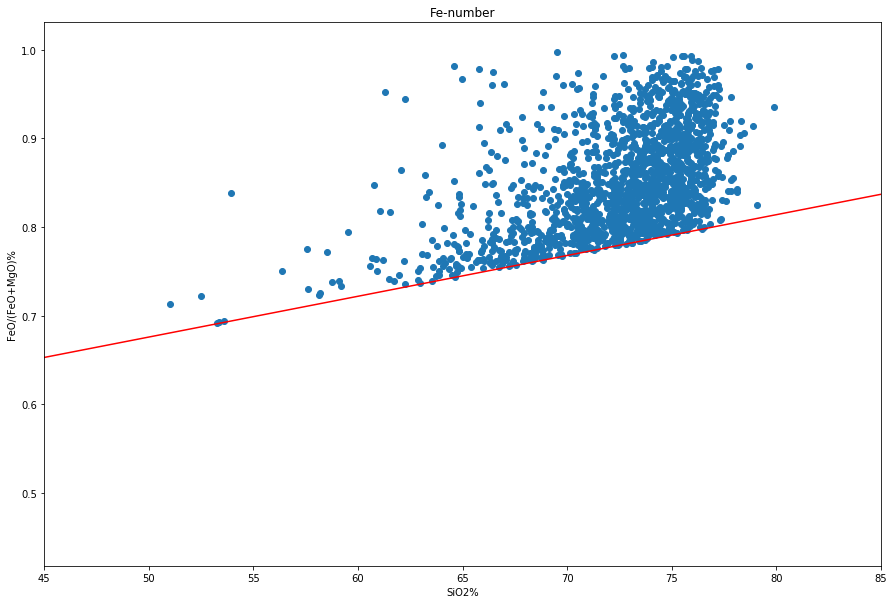

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(Fe_check["SiO2"] , Fe_check["FeO/(FeO+MgO)"])
plt.plot(0.446 + 0.0046 * SiO2, 'red')
plt.xlim((45,85))
plt.ylabel('FeO/(FeO+MgO)%')
plt.xlabel('SiO2%')
plt.title('Fe-number')
plt.show();

## MALI (modified alkali-lime index) 

### based on alkali-lime index of Peacock (1931)

#### --> Na2O + K2O - CaO = -41.86 + 1.112 * wt% SiO2 - 0.00572 * wt% SiO2² boundary between alkalic and alkali-calcic
#### --> Na2O + K2O - CaO = -44,72 + 1.094 * wt% SiO2 - 0.00527 * wt% SiO2² boundary between alkali-calcic and calc-alkalic
#### --> Na2O + K2O - CaO = -45.36 + 1.0043 * wt% SiO2 - 0.00427 * wt% SiO2² boundary between calc-alkalic and calcic

In [30]:
def MALI_classification(df):
    
    df["Na2O+K2O-CaO"] = df["Na2O"] + df["K2O"] - df["CaO"]
    
    SiO2 = df["SiO2"]
    
    # Calculate boundary lines
    df["al_al-calc"] =      -41.86 + (1.1120 * SiO2) - (0.00572 * SiO2 ** 2)
    df["al-calc_calc-al"] = -44.72 + (1.0940 * SiO2) - (0.00527 * SiO2 ** 2)
    df["calc-al_calc"] =    -45.36 + (1.0043 * SiO2) - (0.00427 * SiO2 ** 2)

    df["al_al-calc_Bound"] = df["Na2O+K2O-CaO"] - df["al_al-calc"]
    df["al-calc_calc-al_Bound"] = df["Na2O+K2O-CaO"] - df["al-calc_calc-al"]
    df["calc-al_calc_Bound"] = df["Na2O+K2O-CaO"] - df["calc-al_calc"]
    
    # Perform classification
    df["Mali"] = np.where(df["calc-al_calc_Bound"] >= 0, 'calc-alkalic', 'calcic')
    df["Mali"] = np.where(df["al-calc_calc-al_Bound"]  >= 0, 'alkali-calcic', df["Mali"] )
    df["Mali"] = np.where(df["al_al-calc_Bound"] >= 0, 'alkalic', df["Mali"])

    # Drop temporary classification variables
    df = df.drop(["al_al-calc", "al-calc_calc-al", "calc-al_calc", 
                  "al_al-calc_Bound", "al-calc_calc-al_Bound", "calc-al_calc_Bound"], axis=1)
    
    return df

In [31]:
class_major = MALI_classification(class_major)

In [33]:
class_major

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,P2O5,l.i.,oth,sum,hs,time,FeO/(FeO+MgO),Fe-number,Na2O+K2O-CaO,Mali
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,0.009975,0.349127,0.009975,100.0,0.01,K2,0.811321,magnesian,5.027431,calcic
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,0.050171,0.501706,0.010034,100.0,0.01,Tr,0.583333,magnesian,7.074052,calcic
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,0.009996,1.019592,0.079968,100.0,0.30,K2,0.935135,ferroan,6.757297,calcic
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,0.009931,0.258218,0.009931,100.0,0.01,K1,0.625000,magnesian,7.240044,calcic
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,0.009940,1.739563,0.159046,100.0,0.28,K1,0.981132,ferroan,3.330020,calcic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,0.588705,1.476751,0.009978,100.0,0.30,K1,0.567352,magnesian,-1.885851,alkali-calcic
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,0.259326,0.797925,0.009974,100.0,0.01,K2,0.639403,magnesian,-4.149212,calc-alkalic
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,0.468267,1.484507,0.029889,100.0,0.47,J3,0.471971,magnesian,-3.516987,calc-alkalic
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,0.458167,2.589641,0.009960,100.0,0.47,K2,0.604920,magnesian,-4.243028,calc-alkalic


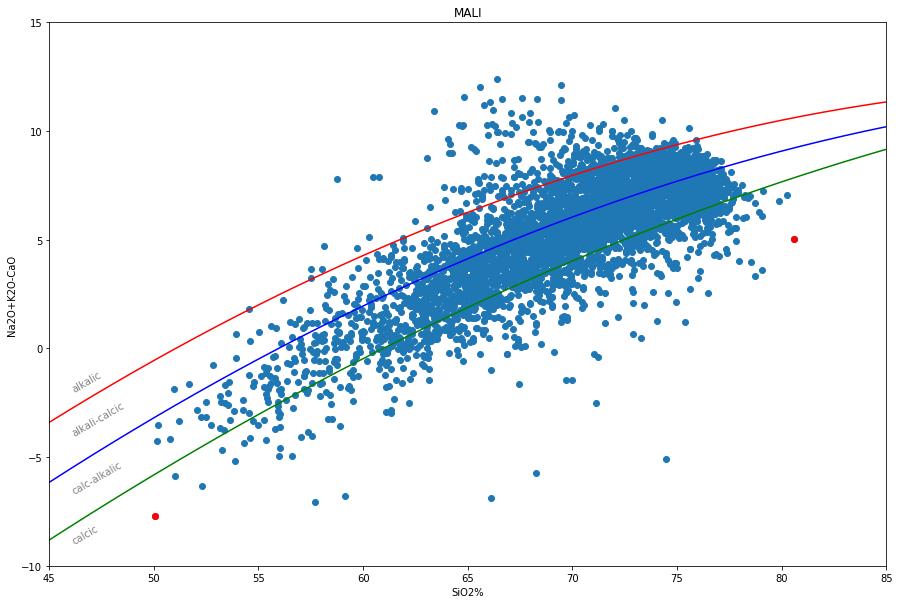

In [37]:
SiO2 = np.arange(0, 101, 1)

plt.figure(figsize=(15,10))

# boundary between alkalic and alkali-calcic
plt.plot(-41.86 + 1.112 * SiO2 - (0.00572 * SiO2 * SiO2), 'red')
# boundary between alkali-calcic and calc-alkalic
plt.plot(-44.72 + 1.094 * SiO2 - (0.00527 * SiO2 * SiO2), 'blue')
# boundary between calc-alkalic and calcic
plt.plot(-45.36 + 1.0043 * SiO2 - (0.00427 * SiO2 * SiO2), 'green')

plt.scatter(class_major["SiO2"], class_major["Na2O+K2O-CaO"])

# Check first sample
plt.scatter(class_major.loc[1, "SiO2"], class_major.loc[1, "Na2O+K2O-CaO"], color="r", zorder=10)
# Check last sample
plt.scatter(class_major.loc[4659, "SiO2"], class_major.loc[4659, "Na2O+K2O-CaO"], color="r", zorder=10)

plt.xlim((45,85))
plt.ylim((-10,15))

plt.text(46, -2, "alkalic", color="grey", rotation=30)
plt.text(46, -4, "alkali-calcic", color="grey", rotation=30)
plt.text(46, -6.7, "calc-alkalic", color="grey", rotation=30)
plt.text(46, -9, "calcic", color="grey", rotation=30)

plt.ylabel('Na2O+K2O-CaO')
plt.xlabel('SiO2%')
plt.title('MALI')

plt.show();

In [149]:
MALI_check = pd.read_excel("../_PETRO/MALI_check.xlsx", index_col=0)

Text(0.5, 1.0, 'MALI')

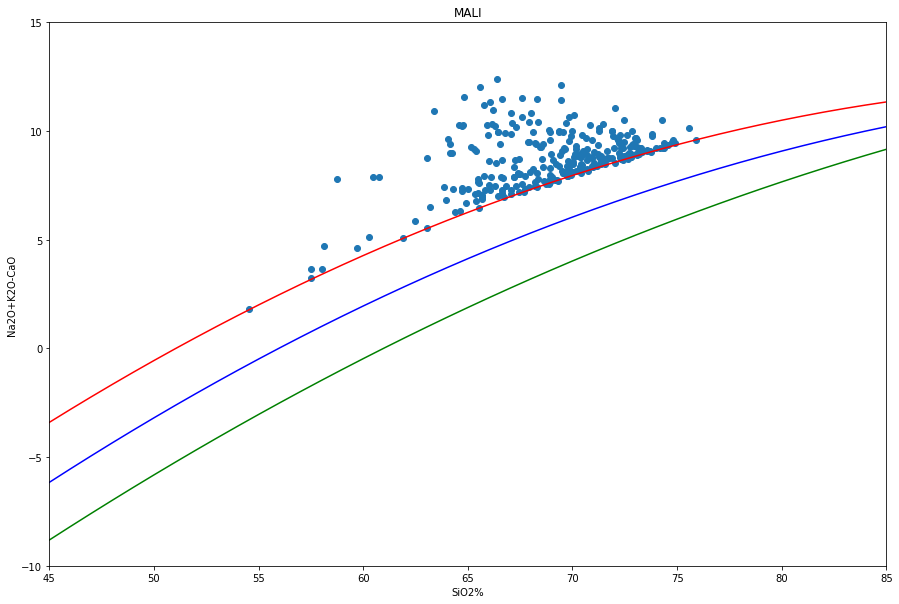

In [150]:
plt.figure(figsize=(15,10))
plt.xlim((45,85))
plt.plot(-41.86 + 1.112 * SiO2 - (0.00572 * SiO2 * SiO2), 'red')
plt.plot(-44.72 + 1.094 * SiO2 - (0.00527 * SiO2 * SiO2), 'blue')
plt.plot(-45.36 + 1.0043 * SiO2 - (0.00427 * SiO2 * SiO2), 'green')
plt.scatter(MALI_check["SiO2"], MALI_check["Na2O+K2O-CaO"])
plt.xlim((45,85))
plt.ylim((-10,15))
plt.ylabel('Na2O+K2O-CaO')
plt.xlabel('SiO2%')
plt.title('MALI')

## ASI (aluminum saturation index) 

### defined as the molecular ratio Al/(Ca - 1.67P + Na +K) --> (Shand, 1943)

#### ASI > 1.0 --> peraluminous (Zen, 1988)
#### ASI < 1.0 and Na+K < molecular Al --> metaluminous 
#### ASI < 1.0 and Na+K > molecular Al --> peralkaline (Zen, 1988)

In [153]:
class_major['molmass_Al2O3'] = (2 * 26.98 + 3 * 16.00)
class_major['molmass_CaO'] = (40.08 + 16.00)
class_major['molmass_P2O5'] = (2 * 30.97 + 5 * 16.00)
class_major['molmass_Na2O'] = (2 * 22.99 + 16.00)
class_major['molmass_K2O'] = (2* 39.10 + 16.00)

In [154]:
class_major['moles_Al2O3'] = class_major['Al2O3'] / class_major['molmass_Al2O3']
class_major['moles_CaO'] = class_major['CaO'] / class_major['molmass_CaO']
class_major['moles_P2O5'] = class_major['P2O5'] / class_major['molmass_P2O5'] 
class_major['moles_Na2O'] = class_major['Na2O'] / class_major['molmass_Na2O']
class_major['moles_K2O'] = class_major['K2O'] / class_major['molmass_K2O']

In [155]:
class_major["ASI_value"] = class_major["moles_Al2O3"]/(class_major["moles_CaO"] - 1.67 * class_major["moles_P2O5"] + class_major["moles_Na2O"] + class_major["moles_K2O"])
class_major["Na+K-Al"] = class_major["moles_Na2O"] + class_major["moles_K2O"] - class_major["moles_Al2O3"]
class_major["ASI"] = ""

In [156]:
class_major["ASI"] = np.where(class_major["Na+K-Al"]  < 0, 'metaluminous', 'peralkaline')
class_major["ASI"] = np.where(class_major["ASI_value"] >= 1, 'peraluminous', class_major["ASI"])

In [157]:
class_major

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,molmass_Na2O,molmass_K2O,moles_Al2O3,moles_CaO,moles_P2O5,moles_Na2O,moles_K2O,ASI_value,Na+K-Al,ASI
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,61.98,94.2,0.099398,0.009783,0.000070,0.032188,0.038015,1.244519,-0.029195,peraluminous
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,61.98,94.2,0.099396,0.006262,0.000353,0.037235,0.054325,1.022257,-0.007836,peraluminous
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,61.98,94.2,0.096960,0.002495,0.000070,0.012096,0.065261,1.216041,-0.019604,peraluminous
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,61.98,94.2,0.093899,0.011865,0.000070,0.059448,0.044808,0.809447,0.010356,peralkaline
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,61.98,94.2,0.099833,0.022157,0.000070,0.024378,0.032501,1.265003,-0.042953,peraluminous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,61.98,94.2,0.190244,0.142696,0.004148,0.066327,0.021291,0.851634,-0.102627,metaluminous
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,61.98,94.2,0.173734,0.150465,0.001827,0.042806,0.017365,0.836935,-0.113564,metaluminous
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,61.98,94.2,0.176182,0.150122,0.003299,0.043080,0.023692,0.833467,-0.109410,metaluminous
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,61.98,94.2,0.215009,0.167127,0.003228,0.065244,0.011525,0.901482,-0.138240,metaluminous


In [158]:
class_major.loc[:, 'ASI']
class_major.iloc[:, 49].value_counts().to_excel("../_PETRO/ASI_counts.xlsx")

In [159]:
class_major.to_excel("../_Petro/classification_altereddata.xlsx")

# cleaning excel file

In [160]:
class_major["classificated"] = class_major[['Fe-number', 'Mali', 'ASI']].agg('/'.join, axis=1)
class_major.to_excel("../_Petro/classification_altereddata.xlsx")

In [161]:
classification = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols = lambda column : column not in ["FeO/(FeO+MgO)", "Miyashiro value", "Fe-miyashiro", "Na2O+K2O-CaO", "al_al-calc", "al-calc_calc-al", "calc-al_calc", "al_al-calc_Bound", "al-calc_calc-al_Bound", "calc-al_calc_Bound", "ASI_value", "Na+K-Al"])

In [162]:
classification.to_excel("../_Petro/classificated.xlsx")

In [163]:
classification.loc[:, 'classificated']
classification.iloc[:, 38].value_counts().to_excel("../_PETRO/classificated_counts.xlsx")

PermissionError: [Errno 13] Permission denied: '../_PETRO/classificated_counts.xlsx'

#### gives 23 !!different classes

# remarks


###### checked everything, Fe-number and MALi seem to be correct if i looked to the graphs (only one small error in the formula of one boundary, but that's resolved), the ASI had to be taken from the molecular ratio, so i calculated the amount of moles (still lot of the data belonging to the peraluminous group). Now there are 20 classes, so there are some classifications still wrong, but i don't see directly where the errors could occur --> maybe we can look to it this monday

# *Fe number 

## just to look if there were any differences

class_major["FeOtot/(FeOtot+MgO)"] = (class_major["FeO"]+class_major["Fe2O3"])/(class_major["FeO"]+class_major["Fe2O3"]+class_major["MgO"])
class_major["*Miyashiro value"] = 0.486 + 0.0046 * class_major["SiO2"]
class_major["*Fe-miyashiro"] = class_major["FeOtot/(FeOtot+MgO)"] - class_major["Miyashiro value"]

bins = [-99, 0, 99]
cats = ["magnesian", "ferroan"]
class_major["*Fe-number"] = pd.cut(class_major["*Fe-miyashiro"], bins=bins, labels=cats)

plt.figure(figsize=(15,10))
plt.scatter(class_major["SiO2"] , class_major["FeOtot/(FeOtot+MgO)"])
plt.plot(0.486 + 0.0046 * SiO2, 'red')
plt.xlim((45,85))
plt.ylabel('FeOtot/(FeOtot+MgO)%')
plt.xlabel('SiO2%')
plt.title('*Fe-number')

class_major.to_excel("../_Petro/classification_altereddata.xlsx")

class_major.loc[:, '*Fe-number']
class_major.iloc[:, 54].value_counts().to_excel("../_PETRO/Fetot-number_counts.xlsx")

class_major["classificated"] = class_major[['*Fe-number', 'Mali', 'ASI']].agg('/'.join, axis=1)
class_major.to_excel("../_Petro/classification_altereddata.xlsx")

classification2 = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols = lambda column : column not in ["FeO/(FeO+MgO)", "Miyashiro value", "Fe-miyashiro", "Na2O+K2O-CaO", "al_al-calc", "al-calc_calc-al", "calc-al_calc", "al_al-calc_Bound", "al-calc_calc-al_Bound", "calc-al_calc_Bound", "ASI_value", "Na+K-Al", "FeOtot/(FeOtot+MgO)", "*Miyashiro value", "*Fe-miyashiro"])

classification.to_excel("../_Petro/classificated_try.xlsx")

classification.loc[:, 'classificated']
classification.iloc[:, 38].value_counts().to_excel("../_PETRO/classificated2_counts.xlsx")